In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from cython_folder.TTM.ttm import TTM

In [2]:
N_tdv = pd.read_pickle('./pickle_folder/search_2215.pkl')

In [3]:
# 学習
# k: トピック数, L: 依存時間数, N: 時刻毎のBOW行列
ttm = TTM(K=10, L=3, V=1500, N_tdv=N_tdv[:1])
# ttm_estimateの引数: 反復数
ttm.ttm_estimate(100)

100%|██████████| 100/100 [09:54<00:00,  5.94s/it]


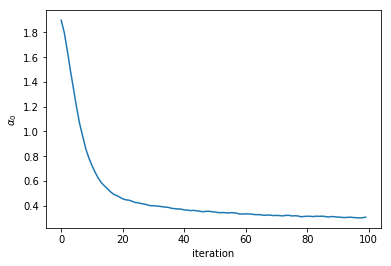

In [4]:
plt.plot(range(len(ttm.alpha_list)), ttm.alpha_list)
#plt.plot(range(len(temp_alpha_list)), temp_alpha_list)
plt.ylabel(r"$\alpha_0$")
plt.xlabel("iteration")
#plt.savefig("./images/first_alpha0.png")
plt.show()

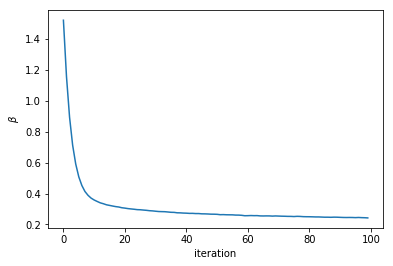

In [5]:
plt.plot(range(len(ttm.beta_list)), ttm.beta_list)
#plt.plot(range(len(temp_alpha_list)), temp_alpha_list)
plt.ylabel(r"$\beta$")
plt.xlabel("iteration")
#plt.savefig("./images/first_alpha0.png")
plt.show()

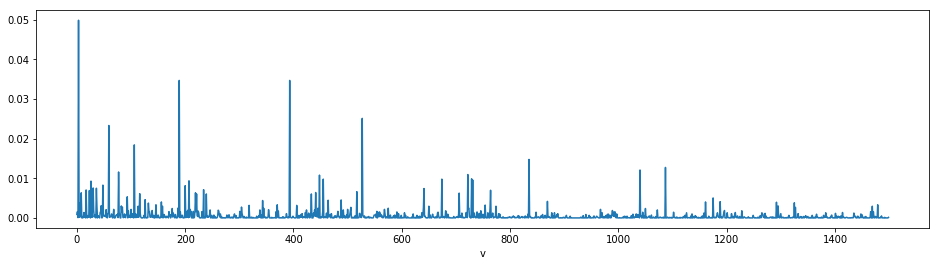

In [10]:
plt.figure(figsize=(16,4))

for k in range(5,6):
    phi_list = np.array(ttm.phi_tkv[0][k])
    plt.plot(range(len(phi_list)), phi_list)
#plt.ylabel(r"$\alpha_0$")
plt.xlabel("v")
#plt.savefig("./images/first_alpha0.png")
plt.show()

In [8]:
for k in range(ttm.K):
    phi_list = np.array(ttm.phi_tkv[0][k])
    print(list(np.argsort(-phi_list))[:20])

[82, 23, 406, 59, 587, 8, 64, 831, 177, 433, 249, 70, 14, 512, 262, 994, 967, 1141, 886, 77]
[30, 158, 59, 182, 98, 274, 146, 262, 907, 994, 77, 267, 270, 471, 161, 931, 1336, 295, 36, 587]
[254, 330, 115, 615, 307, 349, 300, 316, 329, 346, 108, 305, 342, 322, 249, 26, 911, 366, 604, 984]
[117, 381, 25, 77, 387, 449, 316, 332, 36, 68, 246, 724, 351, 126, 325, 911, 45, 156, 322, 964]
[68, 3, 634, 36, 416, 120, 77, 246, 330, 619, 59, 370, 957, 146, 21, 24, 5, 249, 127, 117]
[3, 393, 189, 527, 59, 106, 835, 1087, 1040, 77, 722, 448, 729, 674, 455, 731, 207, 26, 48, 200]
[369, 115, 349, 100, 68, 53, 978, 77, 172, 623, 5, 389, 217, 135, 288, 321, 45, 947, 375, 322]
[106, 77, 23, 457, 886, 107, 65, 138, 118, 976, 463, 246, 132, 500, 480, 36, 1048, 641, 304, 27]
[351, 1312, 68, 247, 192, 200, 179, 149, 833, 316, 5, 108, 563, 322, 926, 719, 115, 36, 59, 292]
[358, 68, 351, 5, 316, 77, 96, 249, 29, 934, 300, 366, 149, 1394, 321, 397, 697, 45, 937, 406]


In [9]:
np.sum(np.array(ttm.theta_tdk[0][0]))

1.0

In [10]:
np.array(ttm.first_alpha)

array([0.36328755, 0.28129338, 0.36272633, 0.30447997, 0.2324783 ,
       0.29119342, 0.43367473, 0.43866014, 0.30020971, 0.26916972])

In [10]:
# 一旦ファイル保存
pd.to_pickle(np.array(ttm.theta_tdk), './pickle_folder/search2215_i100_t0_theta.pkl')
pd.to_pickle(np.array(ttm.phi_tkv), './pickle_folder/search2215_i100_t0_phi.pkl')
pd.to_pickle(np.array(ttm.alpha_tdl), './pickle_folder/search2215_i100_t0_alpha.pkl')
pd.to_pickle(np.array(ttm.beta_tkl), './pickle_folder/search2215_i100_t0_beta.pkl')